# Learn Seaborn

### Import Necessary Libraries

In [2]:
import seaborn as sn

In [3]:
%matplotlib inline

### Load builtin dataset by seaborn

In [8]:
df = sn.load_dataset('tips')

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Dist Plot

#### Enable KDE (kernel density estimation)

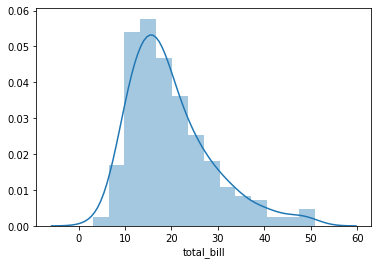

In [14]:
sn.distplot(df['total_bill']) #notice a histogram plot and KDA(kernel density estimation)

#### Disable KDE (Histogram only)

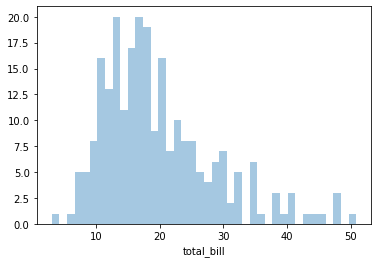

In [19]:
sn.distplot(df['total_bill'],kde=False,bins=40) #custom bins and disable kde

## Joint Plot

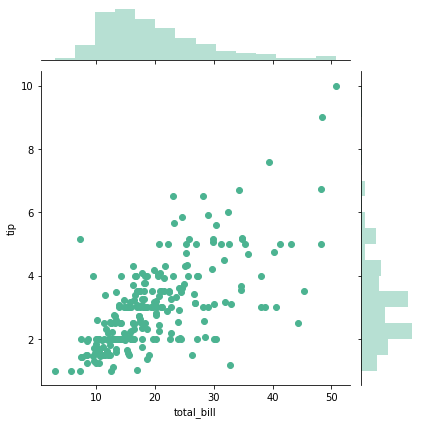

In [25]:
sn.jointplot(x='total_bill',y='tip',data=df, color="#4CB391")

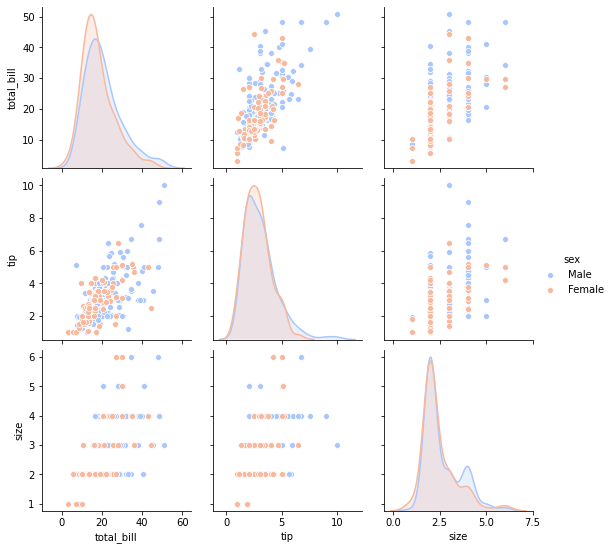

In [28]:
sn.pairplot(df,hue='sex',palette='coolwarm')

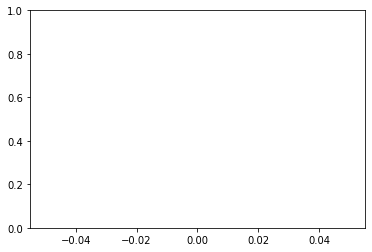

In [32]:
sn.rugplot(df['total_bill'])

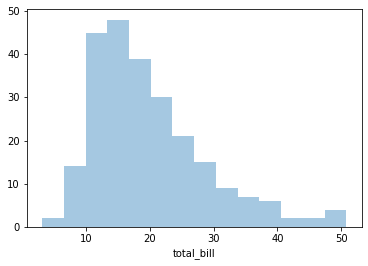

In [33]:
sn.distplot(df['total_bill'],kde=False)

(0.0, 1.0)

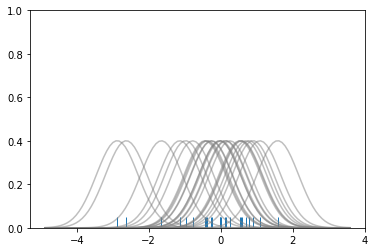

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

### Obtain KDE from summing all kernel list

Text(0.5, 0.98, 'Sum of the Basis Functions')

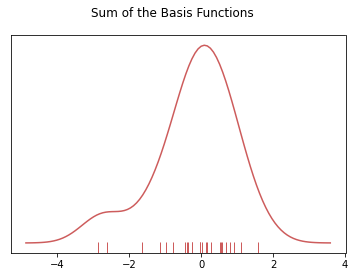

In [7]:
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")